In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [179]:
df = pd.read_csv(r'D:\PYTHON_NOTES\CSV\autos_dataset.csv')

In [180]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [181]:

df['normalized-losses']=df['normalized-losses'].replace("?",np.nan)
df['num-of-doors']=df['num-of-doors'].replace("?",np.nan)
df['peak-rpm']=df['peak-rpm'].replace("?",np.nan)
df['horsepower']=df['horsepower'].replace("?",np.nan)
df['stroke']=df['stroke'].replace("?",np.nan)
df['bore']=df['bore'].replace("?",np.nan)
df['price']=df['price'].replace("?",np.nan)
df['horsepower']=df['horsepower'].astype(float)
df['peak-rpm']=df['peak-rpm'].astype(float)
df['price']=df['price'].astype(float)
df['normalized-losses']=df['normalized-losses'].astype(float)
df['stroke']=df['stroke'].astype(float)
df['bore']=df['bore'].astype(float)

In [182]:
df['normalized-losses']=df['normalized-losses'].fillna(df['normalized-losses'].mean())

df['num-of-doors']=df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])
df['bore']=df['bore'].fillna(df['bore'].mean())
df['stroke']=df['stroke'].fillna(df['stroke'].mean())
df['price']=df['price'].fillna(df['price'].mean())
df['horsepower']=df['horsepower'].fillna(df['horsepower'].mean())
df['peak-rpm']=df['peak-rpm'].fillna(df['peak-rpm'].mean())

In [183]:
for i in df.columns:
    df.rename(columns={i:i.replace("-","_")},inplace=True)
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


# multicollinalriy

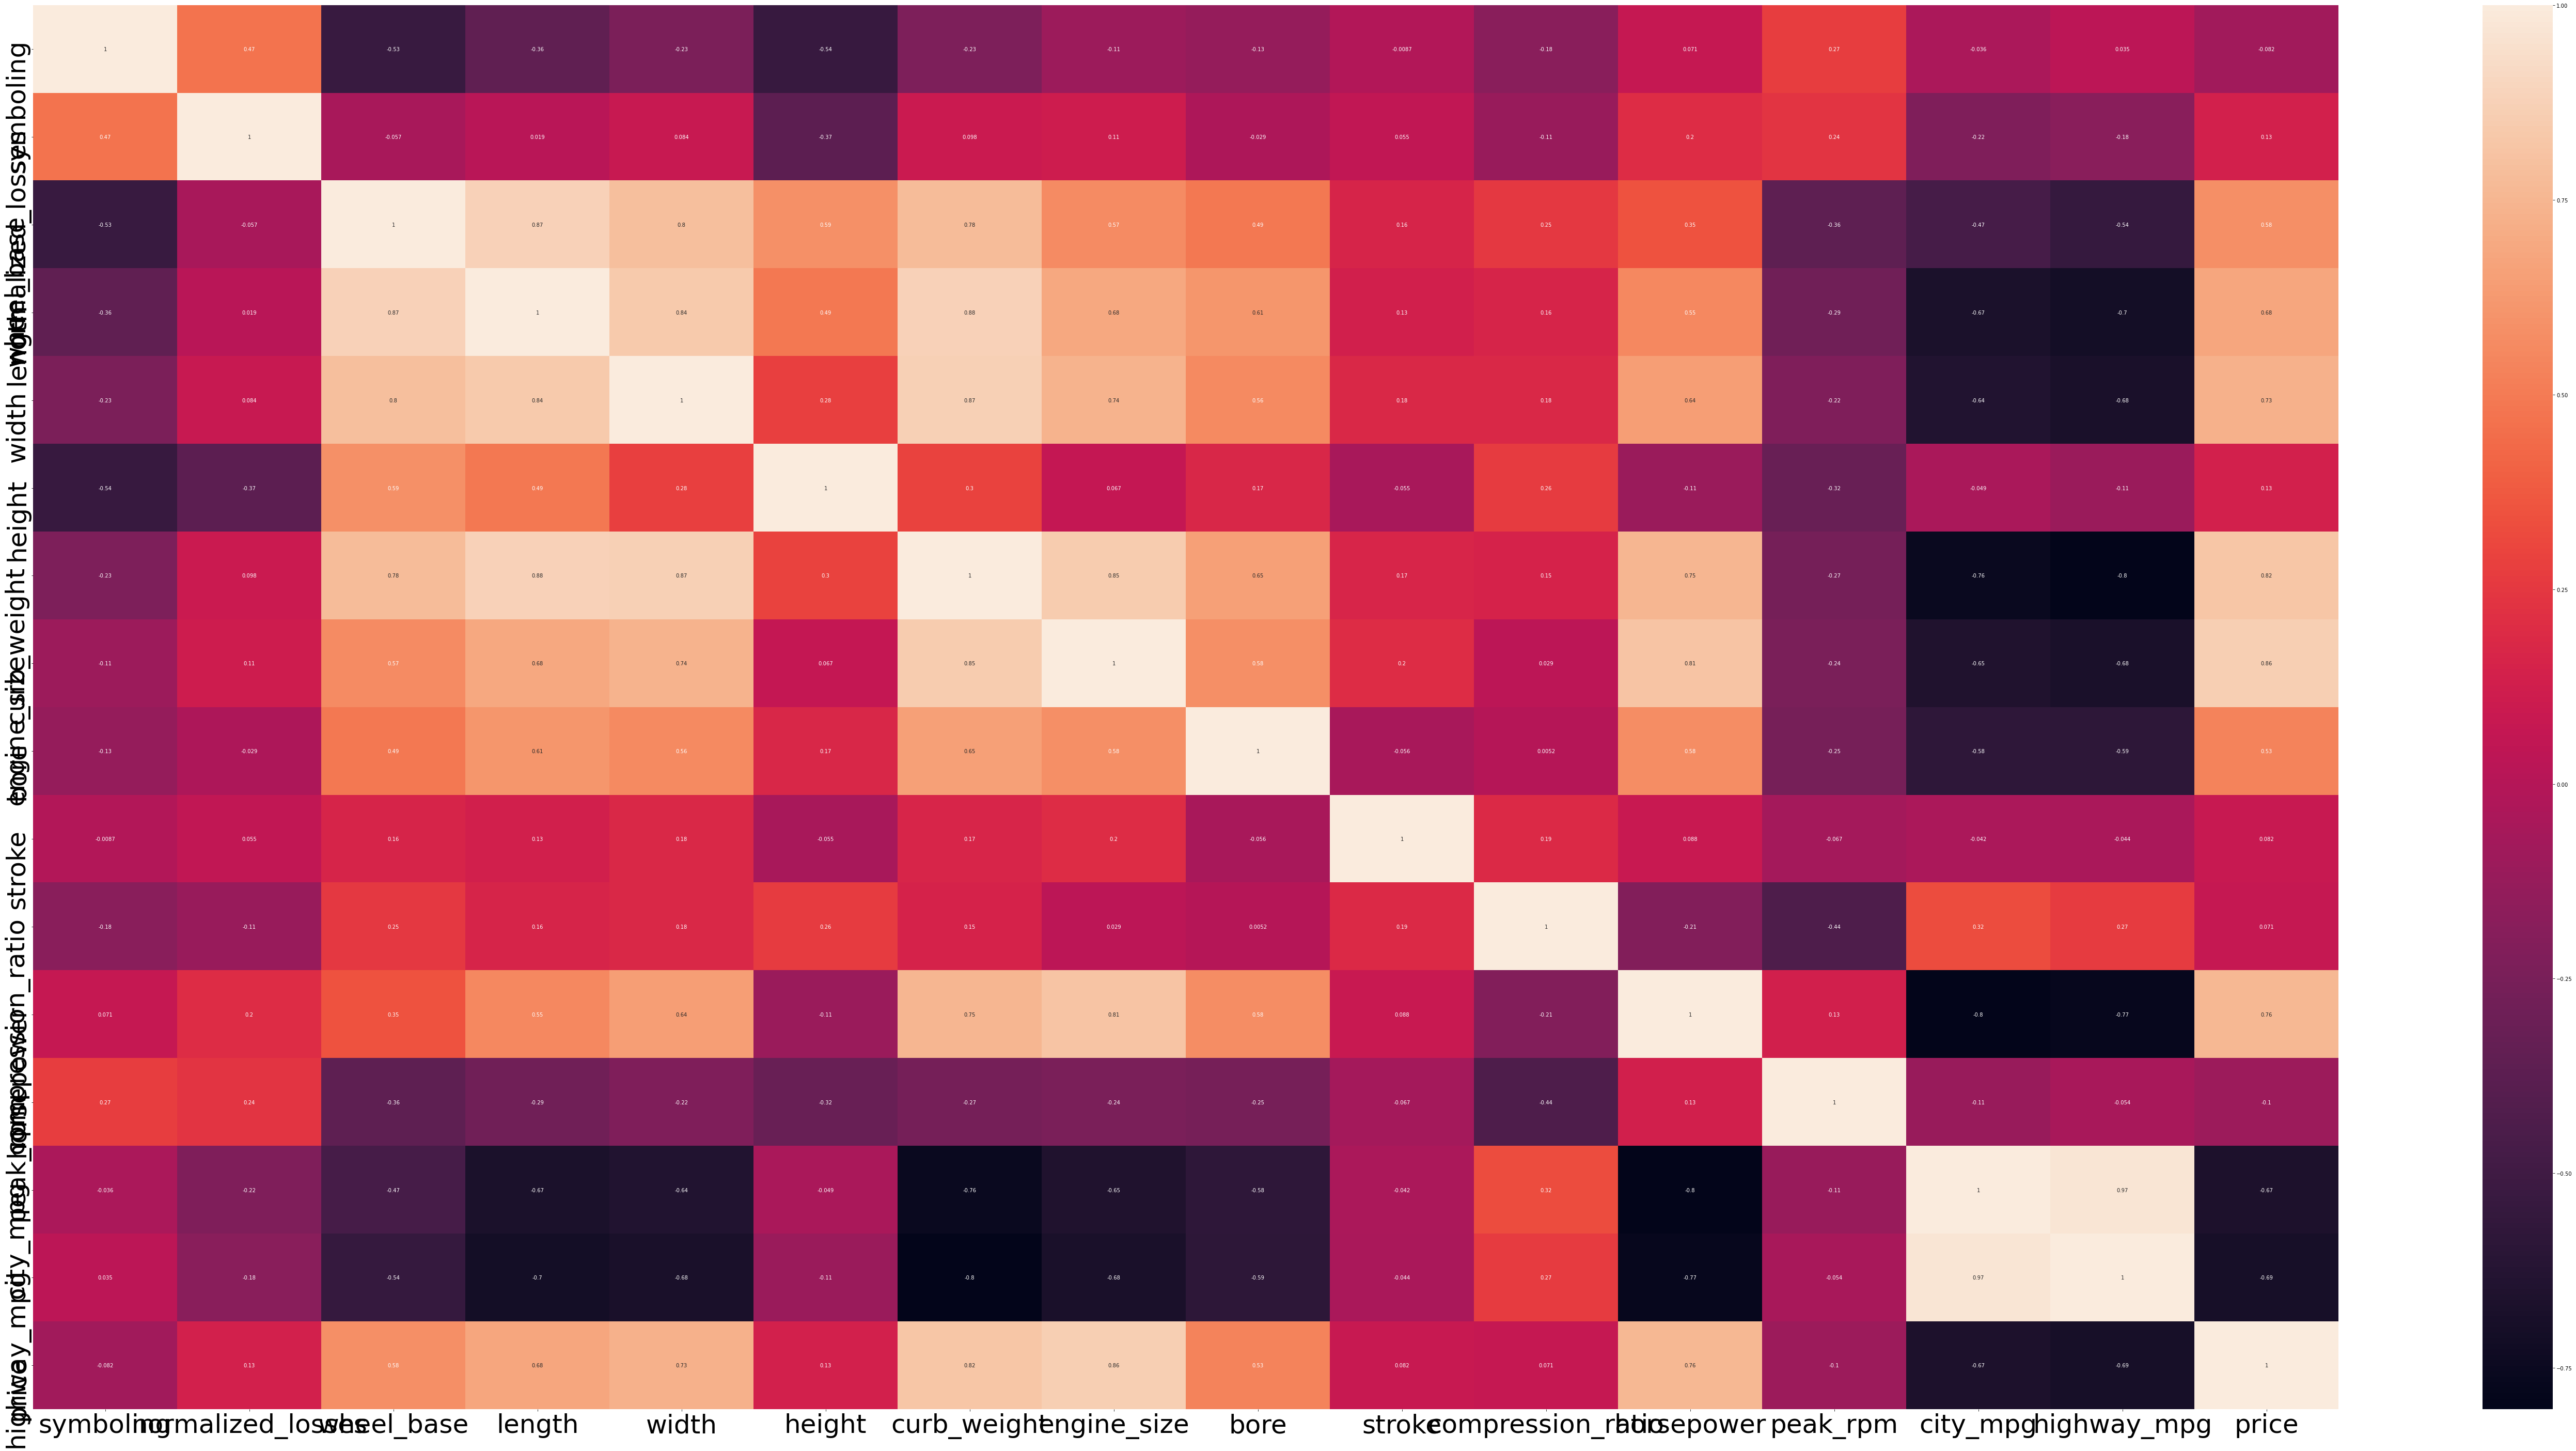

In [184]:
plt.figure(figsize=(100,50))
sns.heatmap(df.corr(),annot=True)
plt.xticks(fontsize=50)

plt.yticks(fontsize=50)
plt.show()

In [185]:
num=df.select_dtypes(exclude=object)

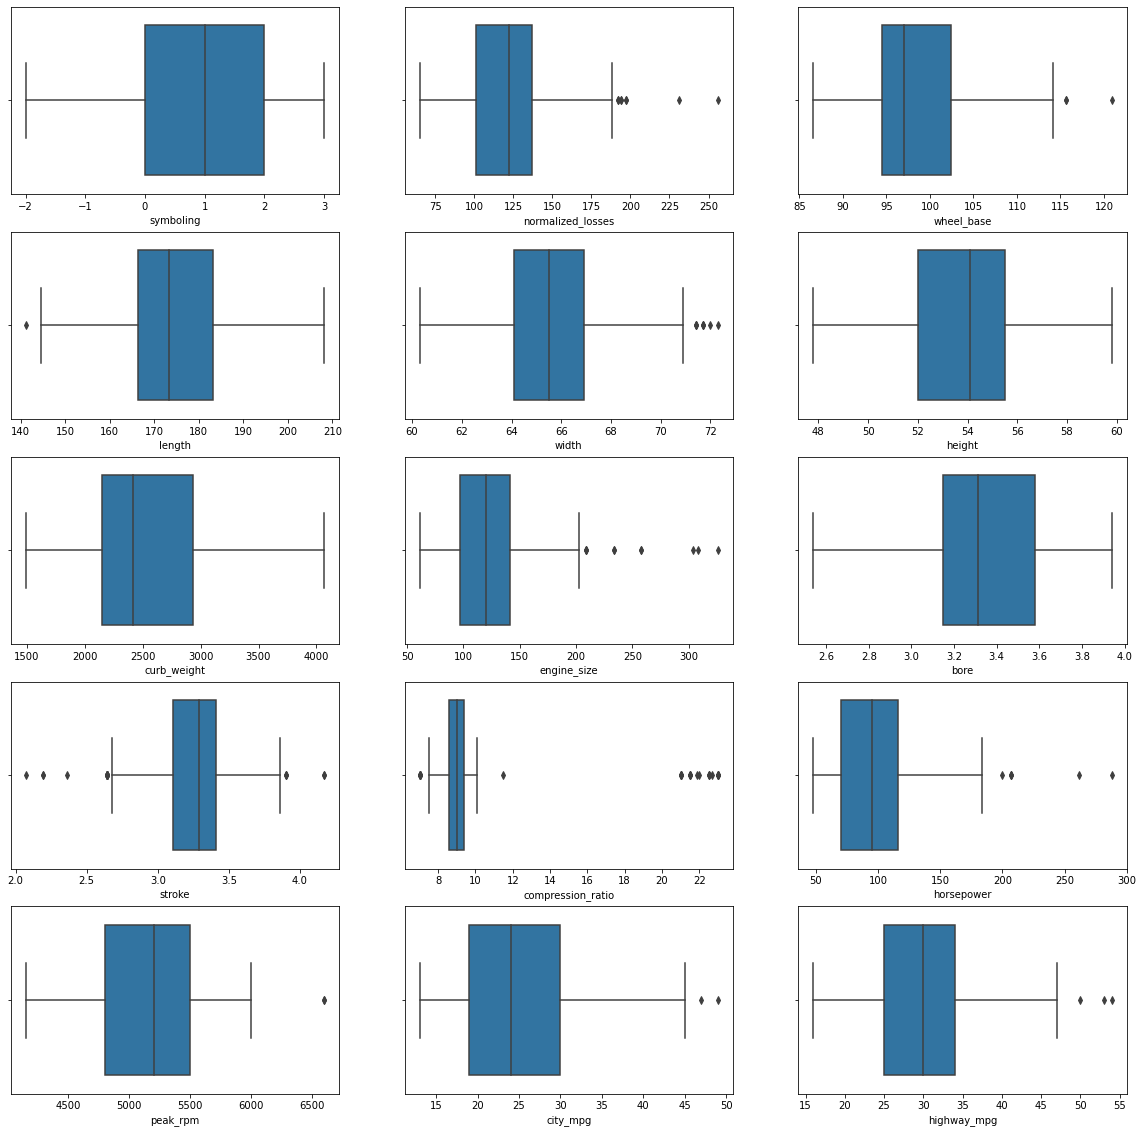

In [186]:
fig ,ax=plt.subplots(5,3,figsize=(20,20))
for col,j in zip(num.columns,ax.flatten()):
    sns.boxplot(num[col],ax=j)


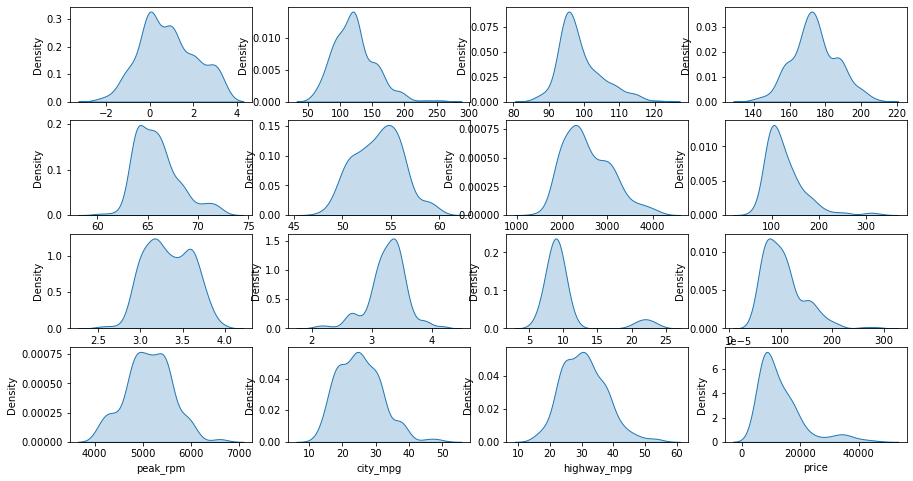

In [187]:
fig,ax=plt.subplots(4,4,figsize=(15,8))
for i,j in zip(num.columns,ax.flatten()):
    sns.kdeplot(num[i],fill=True,ax=j)

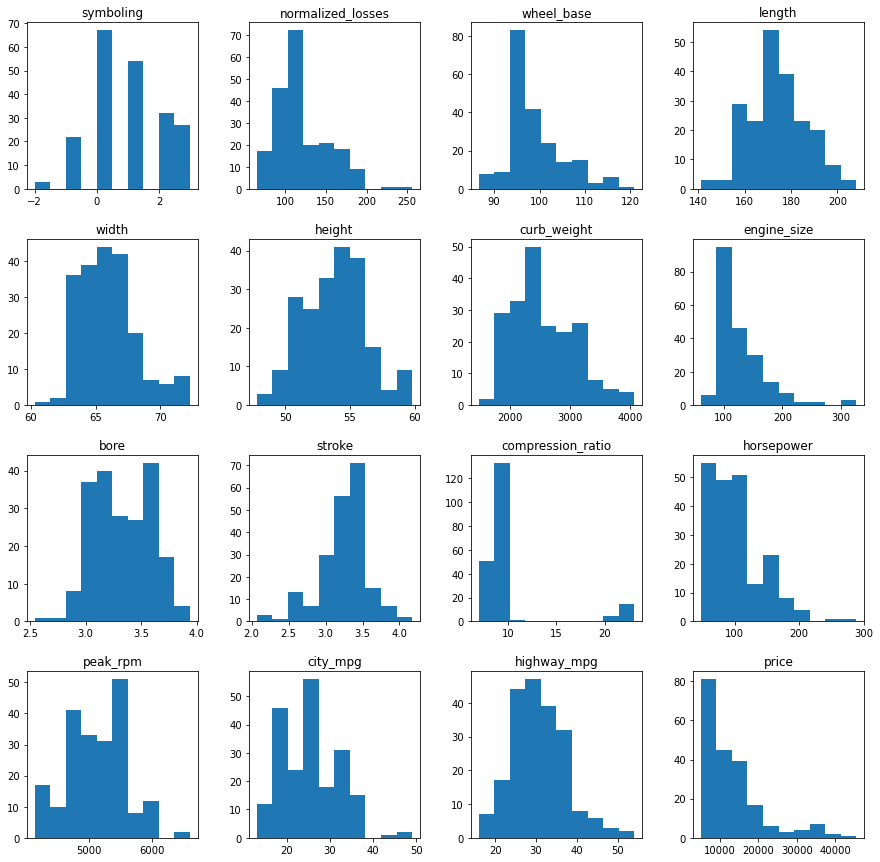

In [188]:
num.hist(grid=False,figsize=(15,15))
plt.show()

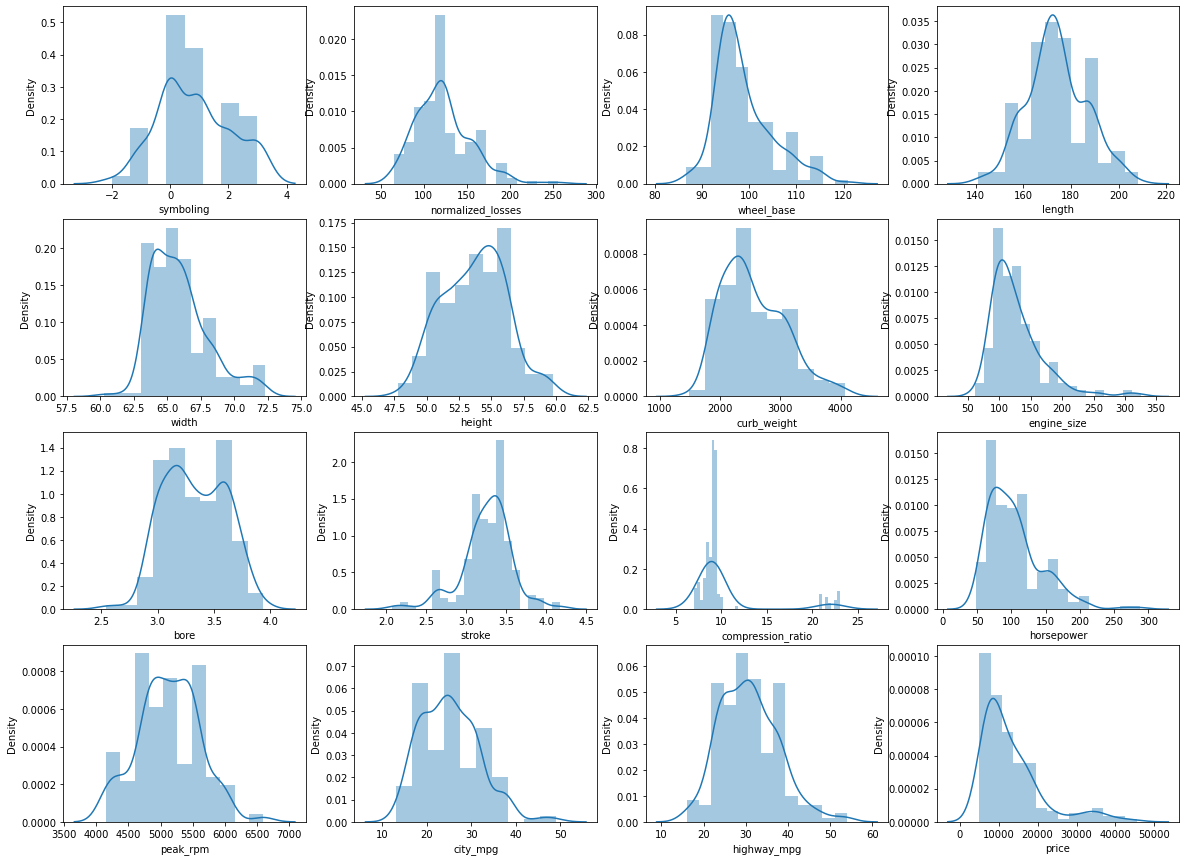

In [189]:
fig,ax=plt.subplots(4,4,figsize=(20,15))
for i,j in zip(num.columns,ax.flatten()):
    sns.distplot(num[i],ax=j)

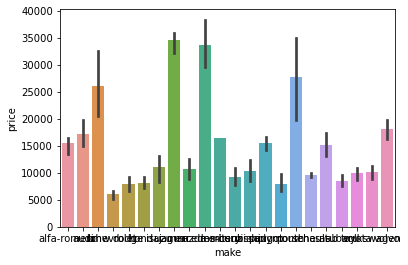

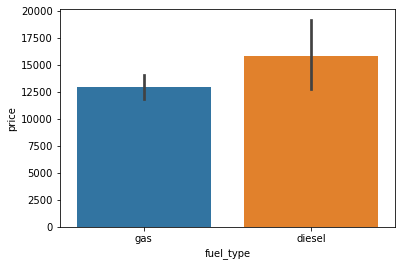

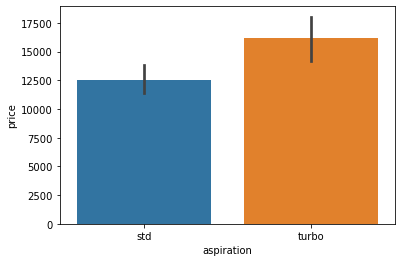

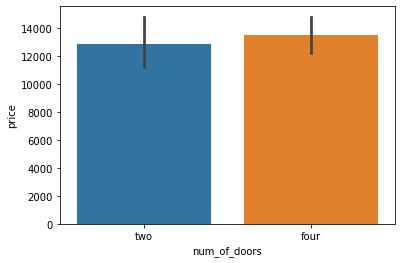

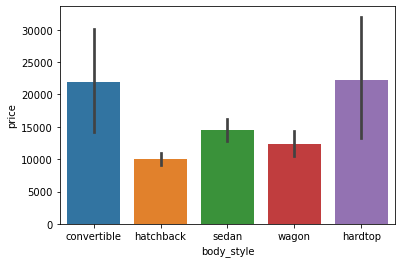

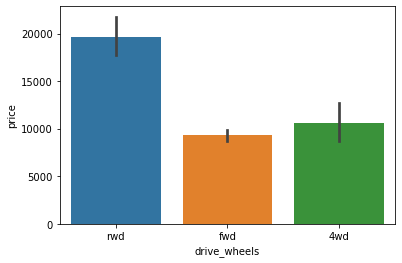

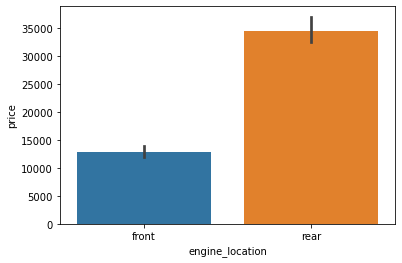

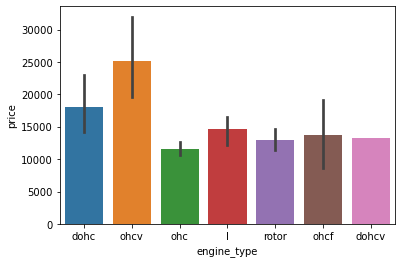

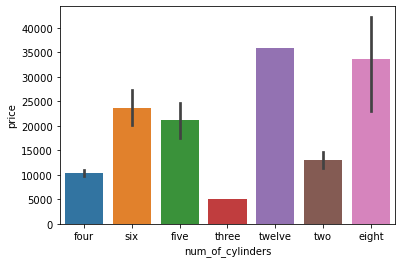

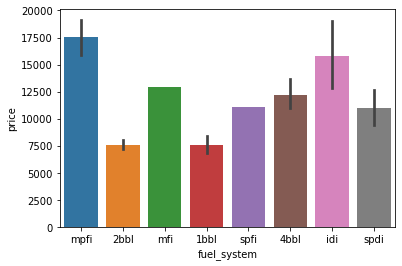

In [190]:
cat =df.select_dtypes(include=object)

for i in cat.columns:
    sns.barplot(cat[i],num['price'])
    plt.show()

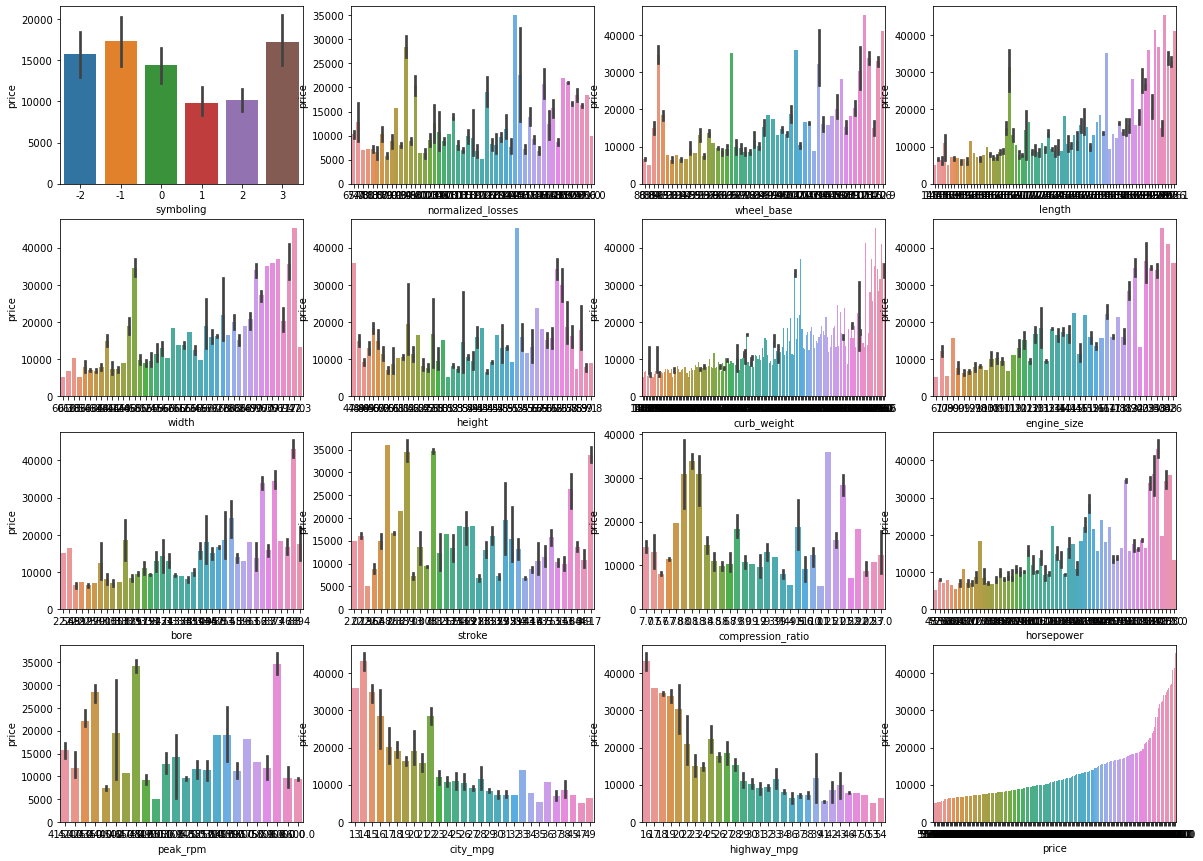

In [191]:
fig,ax=plt.subplots(4,4,figsize=(20,15))
for i,j in zip(num.columns,ax.flatten()):
    sns.barplot(num[i],num['price'],ax=j)

visulaization of outlierby boxplot and detection of outlier iqr, z_score


In [192]:
num.columns

Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [193]:
q1=df['compression_ratio'].quantile(0.25)
q3=df['compression_ratio'].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
df.loc[((df['compression_ratio']>upper_tail) |(df['compression_ratio']<lower_tail))]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,13207.129353
29,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.60,3.90,7.0,145.0,5000.0,19,24,12964.000000
49,0,122.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.000000
63,0,122.0,mazda,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.000000
66,0,122.0,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.000000
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552.000000
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.000000
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.000000
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.000000
82,3,122.0,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.58,3.86,7.0,145.0,5000.0,19,24,12629.000000


In [194]:
mean_val=df['compression_ratio'].loc[~((df['compression_ratio']>upper_tail) |(df['compression_ratio']<lower_tail))].mean()

In [195]:
df['compression_ratio'].loc[((df['compression_ratio']>upper_tail) |(df['compression_ratio']<lower_tail))]=mean_val

In [196]:
df.loc[((df['compression_ratio']>upper_tail) |(df['compression_ratio']<lower_tail))]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [197]:
df.sample(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
99,0,106.0,nissan,gas,std,four,hatchback,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.500000,97.0,5200.0,27,34,8949.0
152,1,74.0,toyota,gas,std,four,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.000000,62.0,4800.0,31,38,6488.0
11,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.800000,101.0,5800.0,23,29,16925.0
160,0,91.0,toyota,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.000000,70.0,4800.0,38,47,7738.0
77,2,161.0,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.400000,68.0,5500.0,31,38,6189.0
111,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.400000,95.0,5000.0,19,24,15580.0
46,2,122.0,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.200000,90.0,5000.0,24,29,11048.0
110,0,122.0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,8.918757,95.0,4150.0,25,25,13860.0
27,1,148.0,dodge,gas,turbo,four,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.600000,102.0,5500.0,24,30,8558.0
162,0,91.0,toyota,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.000000,70.0,4800.0,28,34,9258.0


In [198]:
from scipy.stats import shapiro
_,p_value=shapiro(df.stroke)
if p_value>=0.05:
    print("normal distibution")
else:
    print("non_normal distibution")

non_normal distibution


In [199]:
from scipy.stats import shapiro,kstest,normaltest
_,p_val= shapiro(df.stroke)
if p_val>=0.05:
    print("normal distribution")
else:
    print("non-normal distribution")
    

non-normal distribution


<AxesSubplot:xlabel='stroke'>

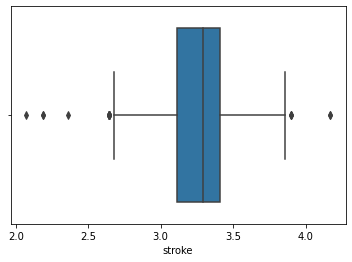

In [200]:
sns.boxplot(df.stroke)

In [201]:
q1=df['stroke'].quantile(0.25)
q3=df['stroke'].quantile(0.75)
iqr=q3-q1
upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr
df.loc[((df['stroke']>upper_tail) |(df['stroke']<lower_tail))]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
29,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.60,3.90,8.918757,145.000000,5000.000000,19,24,12964.0
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.100000,176.000000,4750.000000,15,19,32250.0
48,0,122.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.100000,176.000000,4750.000000,15,19,35550.0
111,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.400000,95.000000,5000.000000,19,24,15580.0
113,0,122.0,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,2.19,8.400000,95.000000,5000.000000,19,24,16695.0
130,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.700000,104.256158,5125.369458,23,31,9295.0
131,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.700000,104.256158,5125.369458,23,31,9895.0
134,3,150.0,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.300000,110.000000,5250.000000,21,28,15040.0
138,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.000000,69.000000,4900.000000,31,36,5118.0
139,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,...,108,2bbl,3.62,2.64,8.700000,73.000000,4400.000000,26,31,7053.0


In [202]:
mean_val=df['stroke'].loc[~((df['stroke']>upper_tail) |(df['stroke']<lower_tail))].mean()

In [203]:
mean_val

3.294441575904257

In [204]:
df['stroke'].loc[((df['stroke']>upper_tail) |(df['stroke']<lower_tail))]=mean_val

In [205]:
df.loc[((df['stroke']>upper_tail) |(df['stroke']<lower_tail))]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [206]:
df.sample(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
21,1,118.0,dodge,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.230000,9.410000,68.0,5500.0,37,41,5572.0
153,0,77.0,toyota,gas,std,four,wagon,fwd,front,95.7,...,92,2bbl,3.05,3.030000,9.000000,62.0,4800.0,31,37,6918.0
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.640000,8.918757,123.0,4350.0,22,25,28176.0
154,0,81.0,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.030000,9.000000,62.0,4800.0,27,32,7898.0
150,1,87.0,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.030000,9.000000,62.0,4800.0,35,39,5348.0
192,0,122.0,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.400000,8.918757,68.0,4500.0,33,38,13845.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.400000,8.500000,110.0,5500.0,19,25,17710.0
148,0,85.0,subaru,gas,std,four,wagon,4wd,front,96.9,...,108,2bbl,3.62,3.294442,9.000000,82.0,4800.0,23,29,8013.0
18,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.030000,9.500000,48.0,5100.0,47,53,5151.0
160,0,91.0,toyota,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.030000,9.000000,70.0,4800.0,38,47,7738.0


<AxesSubplot:xlabel='stroke'>

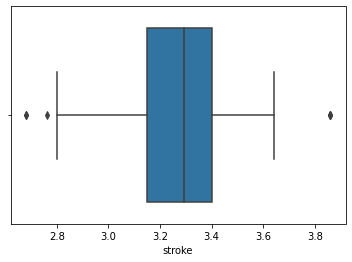

In [207]:
sns.boxplot(df.stroke)

# detection of by z_score

In [211]:
# z_score =x-x_mean/std


In [212]:
x_mean=df.stroke.mean()
std=np.std(df.stroke)

In [213]:
threshold=2
for x in df.stroke:
    z_score=(x-x_mean)/std
    z_score=np.abs(z_score)
    z_score=np.around(z_score,2)
    if z_score>threshold:
        print(x)  

2.68
2.68
2.8
2.8
2.76
3.86
3.86
3.86
3.86
2.87


In [214]:
x_mean=df.bore.mean()
std=np.std(df.bore)
threshold=2
for x in df.bore:
    z_score= (x-x_mean)/std
    z_score=np.abs(z_score)
    z_score=np.around(z_score,2)
    if z_score>threshold:
        print("outliers =",x)

outliers = 2.68
outliers = 3.94
outliers = 3.94
outliers = 2.54


In [215]:
from scipy import stats
z_score=np.abs(stats.zscore(df.bore))
df.iloc[np.where(z_score>2)]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.470000,9.0,154.0,5000.0,19,26,16500.000000
125,3,186.0,porsche,gas,std,two,hatchback,rwd,front,94.5,...,151,mpfi,3.94,3.110000,9.5,143.0,5500.0,19,27,22018.000000
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.110000,10.0,288.0,5750.0,17,28,13207.129353
134,3,150.0,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,3.294442,9.3,110.0,5250.0,21,28,15040.000000


In [216]:
df.head(2)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


In [217]:
df.loc[0,'normalized_losses'::2]

normalized_losses      122.0
fuel_type                gas
num_of_doors             two
drive_wheels             rwd
wheel_base              88.6
width                   64.1
curb_weight             2548
num_of_cylinders        four
fuel_system             mpfi
stroke                  2.68
horsepower             111.0
city_mpg                  21
price                13495.0
Name: 0, dtype: object

# by functuion

In [218]:
from scipy import stats

In [219]:
z_score=np.abs(stats.zscore(df.normalized_losses))
df.iloc[np.where(z_score>2)]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0
11,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925.0
12,0,188.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,20970.0
13,0,188.0,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,21105.0
104,3,194.0,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
105,3,194.0,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699.0
106,1,231.0,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,18399.0
125,3,186.0,porsche,gas,std,two,hatchback,rwd,front,94.5,...,151,mpfi,3.94,3.11,9.5,143.0,5500.0,19,27,22018.0
178,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,20,24,16558.0
179,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,19,24,15998.0


In [220]:
df.sample(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
111,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.460000,3.294442,8.4,95.0,5000.0,19,24,15580.0
173,-1,65.0,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.310000,3.540000,8.7,92.0,4200.0,29,34,8948.0
26,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.970000,3.230000,9.4,68.0,5500.0,31,38,7609.0
54,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.080000,3.150000,9.0,68.0,5000.0,31,38,7395.0
135,2,104.0,saab,gas,std,four,sedan,fwd,front,99.1,...,121,mpfi,3.540000,3.070000,9.3,110.0,5250.0,21,28,15510.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,3.255423,9.4,101.0,6000.0,17,23,11845.0
136,3,150.0,saab,gas,turbo,two,hatchback,fwd,front,99.1,...,121,mpfi,3.540000,3.070000,9.0,160.0,5500.0,19,26,18150.0
186,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.190000,3.400000,9.0,85.0,5250.0,27,34,8495.0
64,0,115.0,mazda,gas,std,four,hatchback,fwd,front,98.8,...,122,2bbl,3.390000,3.390000,8.6,84.0,4800.0,26,32,11245.0
121,1,154.0,plymouth,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.970000,3.230000,9.4,68.0,5500.0,31,38,6692.0


# honadles outliwer

<AxesSubplot:xlabel='normalized_losses'>

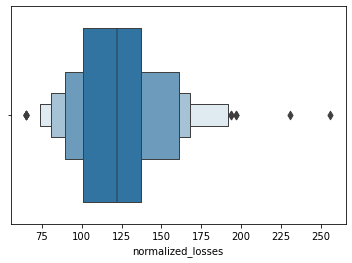

In [221]:
sns.boxenplot(df.normalized_losses)

In [222]:
z_score =np.abs(stats.zscore(df.normalized_losses))

In [223]:
df.loc[(np.where(z_score>2))] ## this is outlier

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0
11,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925.0
12,0,188.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,20970.0
13,0,188.0,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,21105.0
104,3,194.0,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
105,3,194.0,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699.0
106,1,231.0,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,18399.0
125,3,186.0,porsche,gas,std,two,hatchback,rwd,front,94.5,...,151,mpfi,3.94,3.11,9.5,143.0,5500.0,19,27,22018.0
178,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,20,24,16558.0
179,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,19,24,15998.0


In [224]:
df.loc[(np.where(z_score<2))]  # witout outlier

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.000000,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.000000,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.000000,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.000000,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.000000,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.500000,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.700000,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.800000,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,8.918757,106.0,4800.0,26,27,22470.0


In [225]:
mean_=df['normalized_losses'].loc[(np.where(z_score<2))].mean()

In [226]:
df['normalized_losses'].loc[(np.where(z_score>2))]=mean_

In [227]:
df.loc[(np.where(z_score>2))]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
10,2,117.5,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0
11,0,117.5,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925.0
12,0,117.5,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,20970.0
13,0,117.5,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,21105.0
104,3,117.5,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
105,3,117.5,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699.0
106,1,117.5,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,18399.0
125,3,117.5,porsche,gas,std,two,hatchback,rwd,front,94.5,...,151,mpfi,3.94,3.11,9.5,143.0,5500.0,19,27,22018.0
178,3,117.5,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,20,24,16558.0
179,3,117.5,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,19,24,15998.0


<AxesSubplot:xlabel='normalized_losses'>

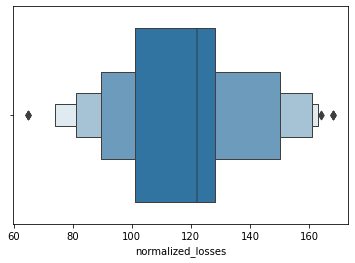

In [228]:
sns.boxenplot(df.normalized_losses)

In [229]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.000000,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.000000,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.000000,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.000000,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.000000,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.500000,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.700000,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.800000,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,8.918757,106.0,4800.0,26,27,22470.0


In [230]:
df.num_of_doors.unique()

array(['two', 'four'], dtype=object)

# one hot

In [231]:
df=pd.get_dummies(df,columns=['fuel_type'],drop_first=True)


In [ ]:
label
ordinary
nominal>>>>>one hot encoding

In [232]:
order = OrdinalEncoder(categories=[['two','four']])
df['num_of_do']=order.fit_transform(df[['num_of_doors']])

In [233]:
from sklearn.preprocessing import OneHotEncoder
one =OneHotEncoder()
df[list(df['make'].unique())]         =one.fit_transform(df[['make']]).A
df[list(df['fuel_system'].unique())]  =one.fit_transform(df[['fuel_system']]).A

In [236]:
df

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,...,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd,engine_location_rear,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor
0,3,122.0,two,88.6,168.8,64.1,48.8,2548,four,130,...,0,0,1,0,0,0,0,0,0,0
1,3,122.0,two,88.6,168.8,64.1,48.8,2548,four,130,...,0,0,1,0,0,0,0,0,0,0
2,1,122.0,two,94.5,171.2,65.5,52.4,2823,six,152,...,0,0,1,0,0,0,0,0,1,0
3,2,164.0,four,99.8,176.6,66.2,54.3,2337,four,109,...,0,1,0,0,0,0,1,0,0,0
4,2,164.0,four,99.4,176.6,66.4,54.3,2824,five,136,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,four,109.1,188.8,68.9,55.5,2952,four,141,...,0,0,1,0,0,0,1,0,0,0
201,-1,95.0,four,109.1,188.8,68.8,55.5,3049,four,141,...,0,0,1,0,0,0,1,0,0,0
202,-1,95.0,four,109.1,188.8,68.9,55.5,3012,six,173,...,0,0,1,0,0,0,0,0,1,0
203,-1,95.0,four,109.1,188.8,68.9,55.5,3217,six,145,...,0,0,1,0,0,0,1,0,0,0


In [235]:
df=pd.get_dummies(df,columns=['make','aspiration','body_style','drive_wheels','engine_location','engine_type','fuel_system'],drop_first=True)

In [238]:
order = OrdinalEncoder(categories=[['two','three','four','five','six','eight','twelve']])
df['num_of_cylinders']=order.fit_transform(df[['num_of_cylinders']])

In [239]:
df

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,...,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,122.0,two,88.6,168.8,64.1,48.8,2548,2.0,130,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,two,88.6,168.8,64.1,48.8,2548,2.0,130,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,two,94.5,171.2,65.5,52.4,2823,4.0,152,...,0,1,0,0,0,0,0,1,0,0
3,2,164.0,four,99.8,176.6,66.2,54.3,2337,2.0,109,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,four,99.4,176.6,66.4,54.3,2824,3.0,136,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,four,109.1,188.8,68.9,55.5,2952,2.0,141,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,four,109.1,188.8,68.8,55.5,3049,2.0,141,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,four,109.1,188.8,68.9,55.5,3012,4.0,173,...,0,1,0,0,0,0,0,1,0,0
203,-1,95.0,four,109.1,188.8,68.9,55.5,3217,4.0,145,...,0,0,0,0,0,1,0,0,0,0


In [240]:
df=df.drop(['num_of_doors'],axis=1)

""
0
1
2
3
4
...
200
201
202
203


In [243]:
x=df.drop("price",axis=1)
y=df['price']

# Train_test_split

In [244]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.8,random_state=45)

In [245]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

# model_evl

In [249]:
y_pred =lr.predict(x_test)


# Residual

In [250]:
residual=y_test-y_pred

# asuumption

In [ ]:
from scipy.stats import shapiro,kstest,normaltest

In [251]:
_,P_val =shapiro(residual)
if P_val>=0.05:
    print("normal")
else:
    print("non-normal")

non-normal


In [253]:
_,P_val =kstest(residual,'norm')
if P_val>=0.05:
    print("normal")
else:
    print("non-normal")

non-normal


In [254]:
_,P_val =normaltest(residual)
if P_val>=0.05:
    print("normal")
else:
    print("non-normal")

non-normal


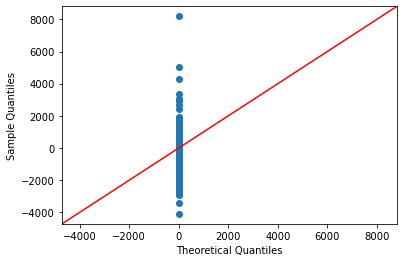

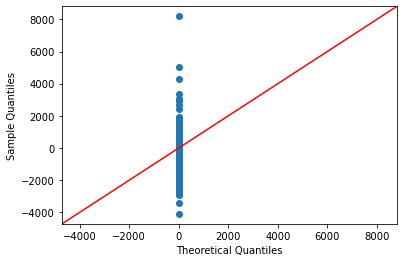

In [257]:
import scipy.stats as sts
import statsmodels.api as sm
sm.qqplot(residual,line='45',dist=sts.norm)

<AxesSubplot:xlabel='price', ylabel='Density'>

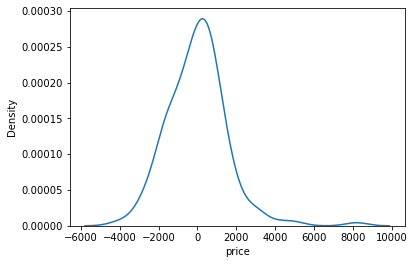

In [258]:
sns.kdeplot(residual)

# Homoscedasity

<AxesSubplot:ylabel='price'>

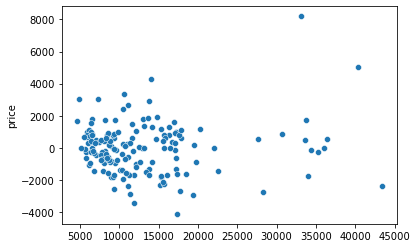

In [259]:
sns.scatterplot(y_pred,residual)

In [261]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [263]:
y_pred_train=lr.predict(x_train)

In [265]:
MAE = mean_absolute_error(y_train,y_pred_train)
print(MAE)
MSE = mean_squared_error(y_train,y_pred_train)
print(MSE)
RMSE =np.sqrt(MSE)
print(RMSE)
# 1189.234398761025
# 2802893.5395655003
# 1674.1844401276403
R2_score =r2_score(y_train,y_pred_train)
print(R2_score)

1111.9861562431295
2057861.1019601289
1434.5246954863235
0.9681171285494398


In [268]:
adjusted_r2= 1-(((1-R2_score)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1))
print(adjusted_r2)

1.0255062971604483


In [270]:
df_set =pd.read_excel("D:/PYTHON_NOTES/EXCEL/Emp_Records.xlsx")
df_set

,Emp ID,First Name,Age in Yrs,Weight in Kgs,Age in Company,Salary,City
0,677509,Lois,36.36,60,13.68,168251,Denver
1,940761,Brenda,47.02,60,9.01,51063,Stonewall
2,428945,Joe,54.15,68,0.98,50155,Michigantown
3,408351,Diane,39.67,51,18.30,180294,Hydetown
4,193819,Benjamin,40.31,58,4.01,117642,Fremont
...,...,...,...,...,...,...,...
95,639892,Jose,22.82,89,1.05,129774,Biloxi
96,704709,Harold,32.61,77,5.93,156194,Carol Stream
97,461593,Nicole,52.66,60,28.53,95673,Detroit
98,392491,Theresa,29.60,57,6.99,51015,Mc Grath


In [276]:
for col in df_set.columns:
    df_set.rename(columns={col:col.replace(" ","_")},inplace=True)

<AxesSubplot:xlabel='Weight_in_Kgs'>

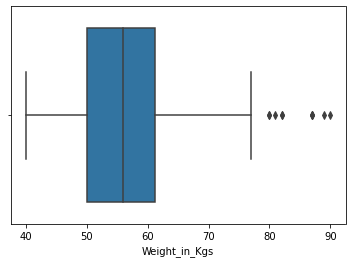

In [278]:
sns.boxplot(df_set['Weight_in_Kgs'])

<AxesSubplot:xlabel='Weight_in_Kgs', ylabel='Density'>

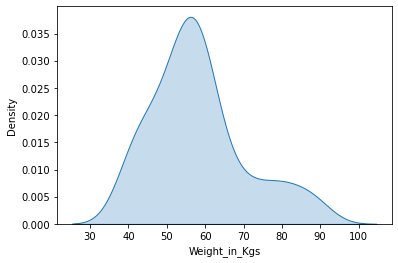

In [285]:
sns.kdeplot(df_set['Weight_in_Kgs'],fill=True)

# transformation

<AxesSubplot:xlabel='Weight_in_Kgs', ylabel='Density'>

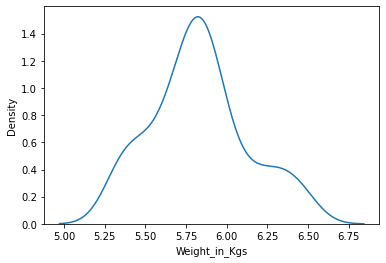

In [288]:
sns.kdeplot(np.log2(df_set['Weight_in_Kgs']))

In [292]:
np.log10(df_set['Weight_in_Kgs'])

0     1.778151
1     1.778151
2     1.832509
3     1.707570
4     1.763428
        ...   
95    1.949390
96    1.886491
97    1.778151
98    1.755875
99    1.740363
Name: Weight_in_Kgs, Length: 100, dtype: float64

In [291]:
df_set['Weight_in_Kgs']

0     60
1     60
2     68
3     51
4     58
      ..
95    89
96    77
97    60
98    57
99    55
Name: Weight_in_Kgs, Length: 100, dtype: int64

# Regulation

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [316]:
from sklearn.datasets import load_
from sklearn import datasets

In [321]:
arr =datasets.load_boston()

In [324]:
df=pd.DataFrame(arr.data,columns=arr.feature_names)

In [325]:
df['price']=arr.target

<AxesSubplot:>

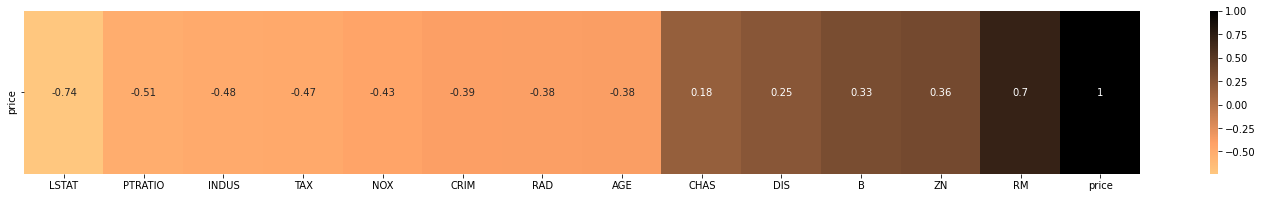

In [336]:
plt.figure(figsize=(25,3))
sns.heatmap(df.corr().sort_values("price",axis=1).tail(1),annot=True,cmap="copper_r")

# vif

In [338]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [343]:
x=df.drop('price',axis=1)

In [344]:
s=[variance_inflation_factor(x.to_numpy(),i) for i in range(x.shape[1])]

<AxesSubplot:>

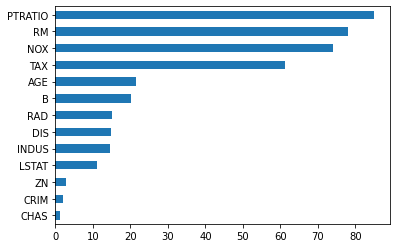

In [345]:
s=pd.Series(s,index=x.columns)
s.sort_values().plot(kind='barh')

In [354]:
x=df.drop("price",axis=1)
y=df['price']
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [356]:
obj_Lass =Lasso(alpha=1.0)
obj_Lass.fit(x_train,y_train)
obj_ridge=Ridge(alpha=1.0)
obj_ridge.fit(x_train,y_train)

Ridge()

In [357]:
y_pred_train = obj_Lass.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print(mse)
mae =mean_absolute_error(y_train,y_pred_train)
print(mae)
r2 = r2_score(y_train,y_pred_train)
print(r2)

r2_adj = 1-(((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1)) # number of predictor p i.e feature
print(r2_adj)

26.416866673122932
3.6501897474021843
0.6959153721670908
0.6857792179059938


In [358]:
y_pred_train = obj_ridge.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print(mse)
mae =mean_absolute_error(y_train,y_pred_train)
print(mae)
r2 = r2_score(y_train,y_pred_train)
print(r2)

r2_adj = 1-(((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1)) # number of predictor p i.e feature
print(r2_adj)

21.82411829157586
3.3003067886850688
0.7487825119234439
0.7404085956542255


# hyperparameter tunning

In [363]:
model=Lasso()
rdcv_para ={"alpha":np.arange(0.01,3,0.01)}
rdsv_l= RandomizedSearchCV(model,grid_para,cv=5)
rdsv_l.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [364]:
rdsv_l.best_estimator_

Lasso(alpha=0.5)

In [366]:
model=Lasso(alpha=0.5)
model.fit(x_train,y_train)
y_pred_train = model.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print(mse)
mae =mean_absolute_error(y_train,y_pred_train)
print(mae)
r2 = r2_score(y_train,y_pred_train)
print(r2)

r2_adj = 1-(((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1)) # number of predictor p i.e feature
print(r2_adj)

23.815518611337723
3.426945260297772
0.7258594971467812
0.7167214803850073


# GRide serachcv

In [368]:
model =Ridge()
para={'alpha':np.arange(0.01,3,0.01)}
grsv=GridSearchCV(model,para,cv=4)
grsv.fit(x_train,y_train)
grsv.best_estimator_


Ridge(alpha=0.01)

In [369]:
model=Ridge(alpha=0.01)
model.fit(x_train,y_train)

Ridge(alpha=0.01)

In [370]:
y_pred_train = model.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print(mse)
mae =mean_absolute_error(y_train,y_pred_train)
print(mae)
r2 = r2_score(y_train,y_pred_train)
print(r2)

r2_adj = 1-(((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1)) # number of predictor p i.e feature
print(r2_adj)

21.641470874961215
3.314069418253494
0.7508849668585106
0.742581132420461


In [302]:
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report,f1_score,recall_score,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [303]:
df =pd.read_csv(r"D:\PYTHON_NOTES\CSV\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [304]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

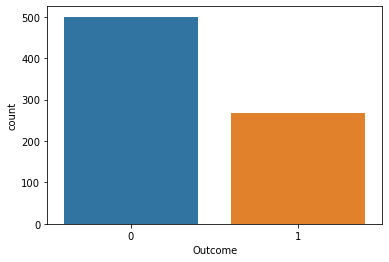

In [305]:
sns.countplot(df.Outcome)

In [306]:
df.Outcome.value_counts()[0]/df.shape[0]*100

65.10416666666666

In [307]:
df.Outcome.value_counts()[1]/df.shape[0]*100

34.89583333333333

In [308]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

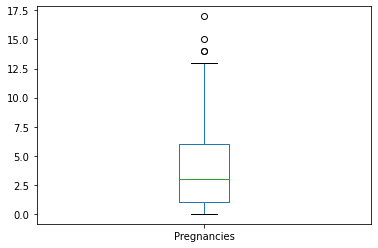

In [309]:
df[['Pregnancies']].boxplot(grid=False)

In [310]:
import plotly.express as px
px.scatter_3d(df,x=df.Pregnancies,y=df.Glucose,z=df.BloodPressure)

In [311]:
import plotly.express as px

In [312]:
px.scatter_3d(df,x=df.Pregnancies,y=df.Glucose,z=df.BMI)

# model training¶

In [313]:
x=df.drop('Outcome',axis=1)
y=df.Outcome

In [314]:
# import matplotlib.pyplot as plt
# from sklearn import datasets, metrics, model_selection, svm
# X, y = datasets.make_classification(random_state=0)
# X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
# clf = svm.SVC(random_state=0)
# clf.fit(X_train, y_train)
# metrics.plot_roc_curve(clf, X_test, y_test)
# plt.show()

In [315]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40)

In [316]:
logist_model=LogisticRegression()
logist_model.fit(x_train,y_train)

LogisticRegression()

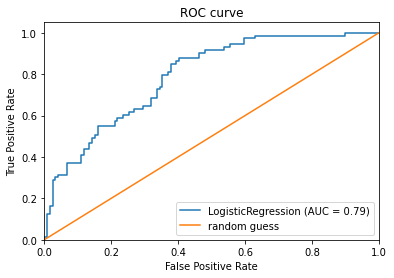

In [332]:
metrics.plot_roc_curve(logist_model, x_test, y_test,drop_intermediate=False)
plt.plot([0, 1], [0, 1], label='random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

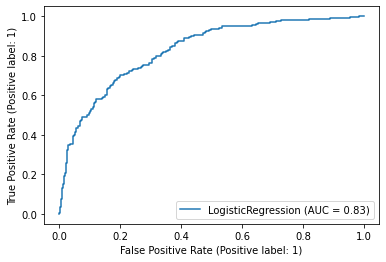

In [270]:
metrics.plot_roc_curve(logist_model, x_train, y_train)
plt.show()

In [247]:
from sklearn.metrics import plot_confusion_matrix

In [248]:
from sklearn.metrics.ConfusionMatrixDisplay.from_predict(logist_model,x_train,y_train,x_train)

SyntaxError: invalid syntax (<ipython-input-248-eabbab234caa>, line 1)

In [243]:
from sklearn import metrics
metrics.plot_roc_curve(logist_model, x_train, x_train)

ValueError: continuous-multioutput format is not supported

In [164]:
plot_confusion_matrix(logist_model,x_train,y_train,labels={'y_true','y_pred'})

TypeError: '<' not supported between instances of 'set' and 'int'

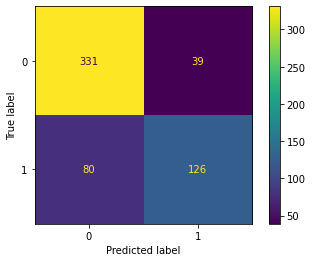

In [165]:
plot_confusion_matrix(logist_model,x_train,y_train)
plt.show()

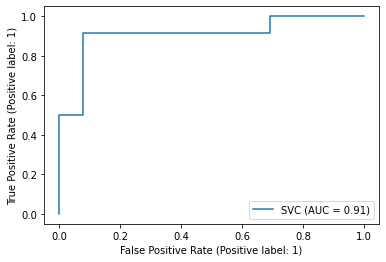

In [252]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
clf = svm.SVC(random_state=40)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

In [251]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

# Training

In [166]:
y_pred_train = logist_model.predict(x_train)
accuracy_score_= accuracy_score(y_train,y_pred_train)
print(accuracy_score_)
classification_report_=classification_report(y_train,y_pred_train)
print(classification_report_)
confusion_matrix_=confusion_matrix(y_train,y_pred_train)
print(confusion_matrix_)

0.7934027777777778
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       370
           1       0.76      0.61      0.68       206

    accuracy                           0.79       576
   macro avg       0.78      0.75      0.76       576
weighted avg       0.79      0.79      0.79       576

[[331  39]
 [ 80 126]]


In [167]:
y_pred_train = logist_model.predict(x_test)
accuracy_score_= accuracy_score(y_test,y_pred_train)
print(accuracy_score_)
classification_report_=classification_report(y_test,y_pred_train)
print(classification_report_)
confusion_matrix_=confusion_matrix(y_test,y_pred_train)
print(confusion_matrix_)


0.7135416666666666
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       130
           1       0.56      0.50      0.53        62

    accuracy                           0.71       192
   macro avg       0.67      0.66      0.66       192
weighted avg       0.71      0.71      0.71       192

[[106  24]
 [ 31  31]]


# Draw varios curve

In [168]:
ROC:
    

SyntaxError: invalid syntax (<ipython-input-168-b165547630cd>, line 1)

In [169]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve


y_pred_prob= np.around(logist_model.predict_proba(x_train),2)[:,1]

In [170]:
fpr,tpr,thr = roc_curve(y_train,y_pred_prob)

Text(0.5, 1.0, 'ROC_Curve')

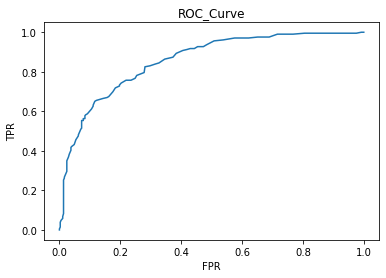

In [171]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_Curve")

# cal Threshol 

In [177]:
y_pred_prob=logist_model.predict_proba(x_train)[:,1]
precision,recalls,threshold=roc_curve(y_train,y_pred_prob)

In [178]:
len(y_train)

576

In [179]:
df11 =pd.DataFrame({'recalls':recalls,'precision':precision,'threshold':threshold})

In [180]:
df11

,recalls,precision,threshold
0,0.000000,0.000000,1.999319
1,0.004854,0.000000,0.999319
2,0.009709,0.000000,0.993611
3,0.009709,0.002703,0.993580
4,0.043689,0.002703,0.973689
...,...,...,...
177,0.990291,0.783784,0.060807
178,0.995146,0.783784,0.060672
179,0.995146,0.991892,0.007888
180,1.000000,0.991892,0.005252


# precision_recall_curve

<AxesSubplot:xlabel='threshold'>

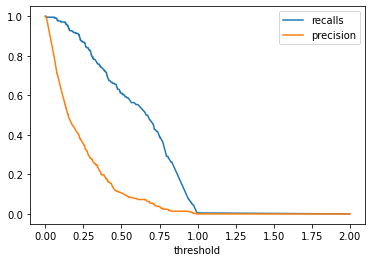

In [182]:
df11.plot(x='threshold',y=['recalls','precision'])

# cal f1 sscore

In [183]:
y_pred_prob=logist_model.predict_proba(x_train)[:,1]
precision,recalls,threshold=precision_recall_curve(y_train,y_pred_prob)

In [184]:
f1score=(2*precision*recalls)/(+precision+recalls)

In [186]:
index=np.argmax(f1score)


302


In [188]:
print(precision[index])
print(recalls[index])
print(threshold[index])
print(f1score[index])


0.6204379562043796
0.8252427184466019
0.2969945406741319
0.7083333333333334


In [333]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.datasets import load_iris,load_diabetes

In [334]:
import plotly.express as px

In [335]:
from sklearn.datasets import load_iris

In [336]:
df=pd.DataFrame(load_iris().data,columns=load_iris().feature_names)

In [337]:
df['Species']=load_iris().target

In [338]:
df.Species.unique()

array([0, 1, 2])

In [350]:
x=df.drop('Species',axis=1)
y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,stratify=y)

In [353]:
model=LogisticRegression(multi_class='ovr')
model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [354]:
y_pred= model.predict(x_train)
classification_report_=classification_report(y_train,y_pred)

print(classification_report_)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.97      0.86      0.91        37
           2       0.88      0.97      0.92        37

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112



# Draw  roc curve

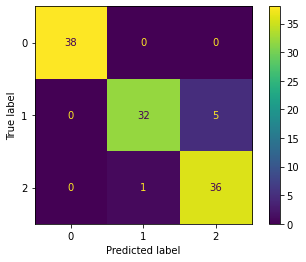

In [355]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x_train,y_train)

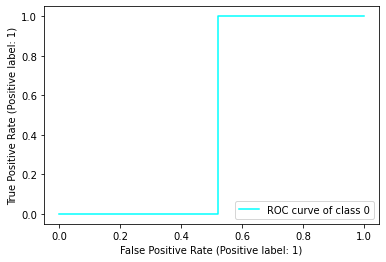

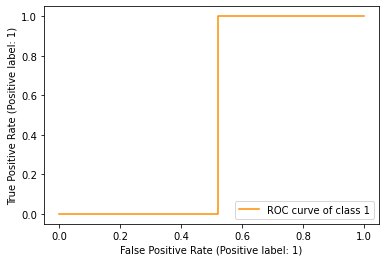

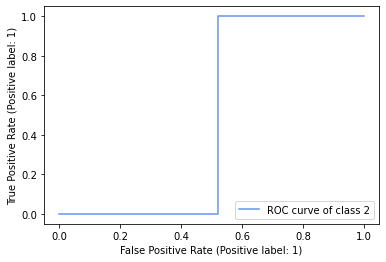

In [359]:
clfs = []
for i in range(3):
    model.fit(x_train,(y_train==i).astype(int))
    clfs.append(model)

# Plot the ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(3), colors):
    metrics.plot_roc_curve(clfs[i], x_test, y_test, color=color, drop_intermediate=False, label='ROC curve of class {0}'.format(i))

# roc curve

In [344]:
y_pred_prob=model.predict_proba(x_train)

In [345]:
fpr,tpr,thr =roc_curve(y_train,y_pred_prob)

ValueError: multiclass format is not supported

In [348]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Assume that you have already fit a classifier and made predictions on the test set  # true labels for the test set
# # predicted labels for the test set

# # Compute the ROC curve and AUC for each class
# n_classes = len(np.unique(y_train))
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_train == i, y_pred_prob == i)
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot the ROC curve for each class
# colors = ['aqua', 'darkorange', 'cornflowerblue']
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class')
# plt.legend(loc="lower right")
# plt.show()

In [349]:
# import numpy as np
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Generate some synthetic data for a multiclass classification problem
# np.random.seed(0)
# n_samples = 1000
# X = np.random.rand(n_samples, 2)
# y = np.random.randint(0, 3, size=n_samples)

# # Split the data into training and test sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a classifier
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = clf.predict(X_test)

# # Compute the ROC curve and AUC for each class
# n_classes = len(np.unique(y_test))
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred == i)
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot the ROC curve for each class
# colors = ['aqua', 'darkorange', 'cornflowerblue']
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class')
# plt.legend(loc="lower right")
# plt.show()


# decision tree for regression

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_absolute_error,mean_squared_error,r2_score
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [20]:
boston =load_boston()
x = pd.DataFrame(boston.data,columns=boston.feature_names)
y = pd.Series(boston.target)

# train

In [21]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=45,test_size=0.20)


In [28]:
dt_tree =DecisionTreeRegressor()
dt_tree.fit(x_train,y_train)


DecisionTreeRegressor()

In [29]:
y_pred=dt_tree.predict(x_train)
mean_squared_error_=mean_squared_error(y_train,y_pred)
mean_squared_error_

0.0

In [30]:
mean_squared_error_=mean_absolute_error(y_train,y_pred)
mean_squared_error_

0.0

In [31]:
mean_squared_error_=r2_score(y_train,y_pred)
mean_squared_error_

1.0

In [32]:
y_pred_=dt_tree.predict(x_test)
mean_squared_error_=mean_squared_error(y_test,y_pred_)
mean_squared_error_

16.24313725490196

In [33]:
mean_squared_error_=r2_score(y_test,y_pred_)
mean_squared_error_

0.8497090893648923

In [34]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import Lasso,Ridge


In [44]:
dt_hy= DecisionTreeRegressor()
para ={'criterion':['mse',',mae'],
      'max_depth':np.arange(2,7),
      'min_samples_split':np.arange(2,5),
      'min_samples_leaf':np.arange(2,4),
      'random_state':[41,42,43,46]}
rdscv= RandomizedSearchCV(dt_hy,para,cv=4)
rdscv.fit(x_train,y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse', ',mae'],
                                        'max_depth': array([2, 3, 4, 5, 6]),
                                        'min_samples_leaf': array([2, 3]),
                                        'min_samples_split': array([2, 3, 4]),
                                        'random_state': [41, 42, 43, 46]})

In [45]:
rdscv.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=3,
                      min_samples_split=4, random_state=46)

In [46]:
para_model=DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=3,
                      min_samples_split=4, random_state=46)

In [47]:
para_model.fit(x_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=3,
                      min_samples_split=4, random_state=46)

In [48]:
y_pred= para_model.predict(x_train)
mean_squared_error_=mean_squared_error(y_train,y_pred)
mean_squared_error_

8.011141723869907

In [50]:
para_model=DecisionTreeRegressor(random_state=46,ccp_alpha=0.0)

In [51]:
para_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=46)

In [53]:
y_pred= para_model.predict(x_test)
mean_squared_error_=mean_squared_error(y_test,y_pred)
mean_squared_error_

17.48686274509804

# perpruning

In [58]:
pre = DecisionTreeRegressor(random_state=45,ccp_alpha=0.0)
pre.fit(x_train,y_train)
y_pred= pre.predict(x_test)
mean_squared_error_=mean_squared_error(y_test,y_pred)
mean_squared_error_

16.224019607843136

# training

# post Pruning

In [60]:
result =pre.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list=result['ccp_alphas']
ccp_alpha_list

array([0.00000000e+00, 2.81403064e-16, 8.44209191e-16, 1.12561225e-15,
       4.50244902e-15, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.23762376e-05, 1.23762376e-05,
       1.23762376e-05, 1.23762376e-05, 1.65016502e-05, 3.71287129e-05,
       4.95049505e-05, 4.95049505e-05, 4.95049505e-05, 4.95049505e-05,
       4.95049505e-05, 4.95049505e-05, 4.95049505e-05, 4.95049505e-05,
       4.95049505e-05, 4.95049505e-05, 4.95049505e-05, 4.95049505e-05,
       4.95049505e-05, 4.95049505e-05, 4.95049505e-05, 4.95049505e-05,
       4.95049505e-05, 4.95049505e-05, 4.95049505e-05, 4.95049505e-05,
      

In [69]:
train_acc=[]
test_acc =[]
for i in ccp_alpha_list:
    dt_reg =DecisionTreeRegressor(random_state=45,ccp_alpha=i)
    dt_reg.fit(x_train,y_train)
    
    # find score
    train_acc.append(dt_reg.score(x_train,y_train))
    test_acc.append(dt_reg.score(x_test,y_test))

In [70]:
np.where(test_acc==np.max(test_acc))

(array([263], dtype=int64),)

In [71]:
test_acc[263]

0.8615549757299665

In [73]:
model_train_ =DecisionTreeRegressor(random_state=45,ccp_alpha=0.86)

In [74]:
model_train_.fit(x_train,y_train)
y_pred=model_train_.predict(x_train)
r2_score=r2_score(y_train,y_pred)

In [75]:
r2_score

0.8788544627029872

In [89]:
test_acc

[0.8498859769045704,
 0.8498859769045704,
 0.8498859769045704,
 0.8498859769045704,
 0.8498859769045704,
 0.8498859769045704,
 0.8498859769045704,
 0.8498859769045704,
 0.8498859769045704,
 0.8498893785880257,
 0.8498893785880257,
 0.8498893785880257,
 0.8499136439300071,
 0.8499136439300071,
 0.8499136439300071,
 0.8499136439300071,
 0.8499136439300071,
 0.8499136439300071,
 0.8499136439300071,
 0.8499136439300071,
 0.8499587729305147,
 0.8499587729305147,
 0.8499587729305147,
 0.8499587729305147,
 0.8499587729305147,
 0.8499587729305147,
 0.8499587729305147,
 0.8499587729305147,
 0.8499587729305147,
 0.8499587729305147,
 0.8499587729305147,
 0.8499587729305147,
 0.8499587729305147,
 0.8499587729305147,
 0.8499680456676374,
 0.8499680456676374,
 0.8500397077990967,
 0.8499362966220542,
 0.8500660141511514,
 0.8500660141511514,
 0.8500660141511514,
 0.8500660141511514,
 0.8500660141511514,
 0.8500660141511514,
 0.8500660141511514,
 0.850013401447042,
 0.850013401447042,
 0.850025193949

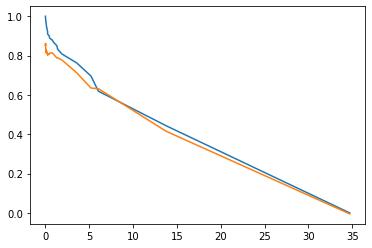

In [77]:
plt.plot(ccp_alpha_list,train_acc)
plt.plot(ccp_alpha_list,test_acc)

In [86]:
arr=dt_reg.feature_importances_

In [87]:
arr

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<AxesSubplot:>

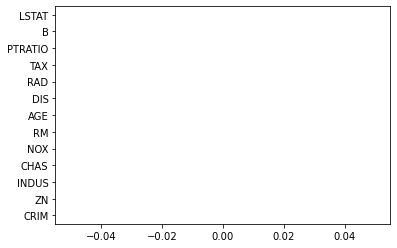

In [88]:
s=pd.Series(arr,index=x.columns)
s.sort_values().plot(kind='barh')

In [90]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor



In [91]:
df =pd.read_csv(r"D:/PYTHON_NOTES/CSV/heart.csv")

In [94]:
x=df.drop('target',axis=1)
y=df['target']

In [98]:
from sklearn.model_selection import train_test_split

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [147]:
ada_model =AdaBoostClassifier()
ada_model.fit(x_train,y_train)

AdaBoostClassifier()

In [148]:
from sklearn.metrics import classification_report
y_pred= ada_model.predict(x_train)
classification_report_=classification_report(y_train,y_pred)
print(classification_report_)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       110
           1       0.92      0.93      0.93       132

    accuracy                           0.92       242
   macro avg       0.92      0.92      0.92       242
weighted avg       0.92      0.92      0.92       242



In [149]:
y_pred= ada_model.predict(x_test)
classification_report_=classification_report(y_test,y_pred)
print(classification_report_)

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



In [116]:
arr=ada_model.feature_importances_

<AxesSubplot:>

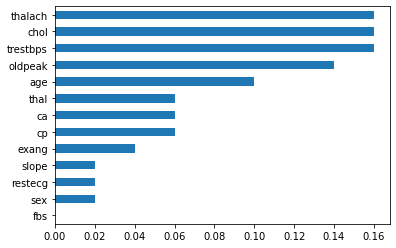

In [117]:
s=pd.Series(arr,index=x.columns)
s.sort_values().plot(kind='barh')

# hyperparametertunning

In [126]:
model_=AdaBoostClassifier()
hyper ={'n_estimators':np.arange(10,20),
        'learning_rate':np.arange(0,2,0.01)}
rand =RandomizedSearchCV(model_,hyper,cv=5)
rand.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.5...
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53,
       1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64,
       1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75,
       1.76, 1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86,
       1.87, 1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97,
       1.98, 1.99]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [121]:
hyper = {'n_estimators':np.arange(10,50)
        ,'learning_rate':np.arange(0,2,0.01)}


In [127]:
rand.best_estimator_

AdaBoostClassifier(learning_rate=0.68, n_estimators=18)

In [128]:
adddd =AdaBoostClassifier(learning_rate=0.68, n_estimators=18)

In [129]:
adddd.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.68, n_estimators=18)

In [130]:
y_pred =adddd.predict(x_train)
classification_report_=classification_report(y_train,y_pred)

In [132]:
print(classification_report_)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       103
           1       0.90      0.93      0.91       124

    accuracy                           0.90       227
   macro avg       0.90      0.90      0.90       227
weighted avg       0.90      0.90      0.90       227



In [133]:
y_pred =adddd.predict(x_test)
classification_report_=classification_report(y_test,y_pred)

In [134]:
print(classification_report_)

              precision    recall  f1-score   support

           0       0.91      0.60      0.72        35
           1       0.74      0.95      0.83        41

    accuracy                           0.79        76
   macro avg       0.82      0.78      0.78        76
weighted avg       0.82      0.79      0.78        76



In [136]:
s=pd.Series(adddd.feature_importances_,index=x.columns)

<AxesSubplot:>

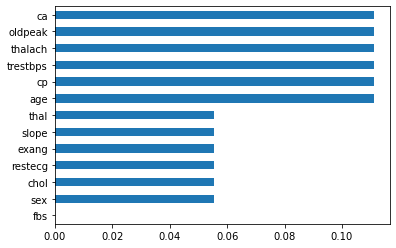

In [137]:
s.sort_values().plot(kind='barh')

In [138]:
rf_forest =RandomForestClassifier()
rf_forest.fit(x_train,y_train)
y_pred= rf_forest.predict(x_train)
classification_report_=classification_report(y_train,y_pred)
print(classification_report_)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       124

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



In [140]:
rf_forest =RandomForestClassifier()
rf_forest.fit(x_train,y_train)
y_pred= rf_forest.predict(x_test)
classification_report_=classification_report(y_test,y_pred)
print(classification_report_)

              precision    recall  f1-score   support

           0       0.88      0.60      0.71        35
           1       0.73      0.93      0.82        41

    accuracy                           0.78        76
   macro avg       0.80      0.76      0.76        76
weighted avg       0.80      0.78      0.77        76



In [2]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from imblearn.over_sampling import SMOTE,RandomOverSampler

In [3]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [4]:
df =pd.read_csv("D:/PYTHON_NOTES/CSV/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
x=df.drop('Outcome',axis=1)
y=df.Outcome

In [6]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=45,stratify=y)

In [8]:
rf_model =RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred =rf_model.predict(x_train)
classification_report_=classification_report(y_train,y_pred)
print(classification_report_)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [9]:
y_pred =rf_model.predict(x_test)
classification_report_=classification_report(y_test,y_pred)
print(classification_report_)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.79      0.56      0.65        54

    accuracy                           0.79       154
   macro avg       0.79      0.74      0.75       154
weighted avg       0.79      0.79      0.78       154



In [10]:
sns.countplot(df.Outcome)

NameError: name 'sns' is not defined

# hyperParameter

In [ ]:
hy_model =RandomForestClassifier()
para ={"n_estimators":np.arange(10,20),
      "criterion":['gini','Entropy'],
      'max_depth':np.arange(4,10),
      "min_samples_split":np.arange(3,10),
      'min_samples_leaf':np.arange(3,10),
      'max_features':['sqrt','log2'],
      'random_state':[41,42,43,44,45],
      'oob_score':[True]}
rand =RandomizedSearchCV(hy_model,para,cv=5)
rand.fit(x_train,y_train)


In [ ]:
rand.best_estimator_

In [11]:
new_model=RandomForestClassifier(max_depth=4, min_samples_leaf=7, min_samples_split=6,
                       n_estimators=16, oob_score=True, random_state=43)

In [12]:
new_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=7, min_samples_split=6,
                       n_estimators=16, oob_score=True, random_state=43)

In [13]:
y_pred =new_model.predict(x_train)
classification_report_=classification_report(y_train,y_pred)

In [14]:
print(classification_report_)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       400
           1       0.81      0.57      0.67       214

    accuracy                           0.80       614
   macro avg       0.80      0.75      0.76       614
weighted avg       0.80      0.80      0.79       614



In [15]:
new_model.feature_importances_

array([0.05049866, 0.38436435, 0.04550939, 0.02115942, 0.03856089,
       0.19235965, 0.0836896 , 0.18385804])

<AxesSubplot:>

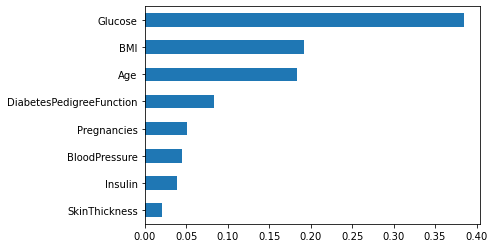

In [16]:
s=pd.Series(new_model.feature_importances_,index=x.columns)
s.sort_values().plot(kind='barh')

In [17]:
new_model.oob_score_

0.745928338762215

In [18]:
smt =SMOTE()
x,y=smt.fit_resample(x,y)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.25)

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
from sklearn.datasets import load_boston
boston = load_boston()
x=pd.DataFrame(boston.data,columns=boston.feature_names)
y=pd.Series(boston.target)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)


In [16]:
dt_reg =DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)


DecisionTreeRegressor()

In [17]:
y_pred_train = dt_reg.predict(x_train)
MAE = mean_absolute_error(y_train,y_pred_train)
print(MAE)
MSE = mean_squared_error(y_train,y_pred_train)
print(MSE)

R2_Score = r2_score(y_train,y_pred_train)
print(R2_Score)

0.0
0.0
1.0


In [19]:
y_pred_test = dt_reg.predict(x_test)
MAE = mean_absolute_error(y_test,y_pred_test)
print(MAE)
MSE = mean_squared_error(y_test,y_pred_test)
print(MSE)

R2_Score = r2_score(y_test,y_pred_test)
print(R2_Score)

2.872549019607843
15.900784313725493
0.8528767369985101


In [20]:
rf_mdel=RandomForestRegressor()
rf_mdel.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
y_pred_train = rf_mdel.predict(x_train)
MAE = mean_absolute_error(y_train,y_pred_train)
print(MAE)
MSE = mean_squared_error(y_train,y_pred_train)
print(MSE)

R2_Score = r2_score(y_train,y_pred_train)
print(R2_Score)

0.8158019801980192
1.5394342821782179
0.9803493292500093


In [23]:
y_pred_test = rf_mdel.predict(x_test)
MAE = mean_absolute_error(y_test,y_pred_test)
print(MAE)
MSE = mean_squared_error(y_test,y_pred_test)
print(MSE)

R2_Score = r2_score(y_test,y_pred_test)
print(R2_Score)

2.3855980392156853
10.129582127450975
0.9062752411435615


In [27]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [30]:
model = RandomForestRegressor()
hype ={'n_estimators':np.arange(10,20),
      'criterion':['mse','mae'],
      'max_depth':np.arange(4,10),
      'min_samples_split':np.arange(4,10),
      'min_samples_leaf':np.arange(3,10),
      'max_features':['sqrt','log2'],
      'random_state':[41,42,43,44,45],
      'oob_score':[True]}
rdscv =RandomizedSearchCV(model,hype,cv=5)

In [32]:
rdscv.fit(x_train,y_train)
rdscv.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=9, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=5, n_estimators=14,
                      oob_score=True, random_state=43)

In [33]:
model1=RandomForestRegressor(criterion='mse', max_depth=9, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=5, n_estimators=14,
                      oob_score=True, random_state=43)

In [34]:
model1.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=9, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=5, n_estimators=14,
                      oob_score=True, random_state=43)

In [35]:
y_pred_train = model1.predict(x_train)
MAE = mean_absolute_error(y_train,y_pred_train)
print(MAE)
MSE = mean_squared_error(y_train,y_pred_train)
print(MSE)

R2_Score = r2_score(y_train,y_pred_train)
print(R2_Score)

1.8977181364078222
8.250452590633643
0.8946840866973884


In [36]:
y_pred_test = model1.predict(x_test)
MAE = mean_absolute_error(y_test,y_pred_test)
print(MAE)
MSE = mean_squared_error(y_test,y_pred_test)
print(MSE)

R2_Score = r2_score(y_test,y_pred_test)
print(R2_Score)

2.7968774092004027
13.813567956171354
0.8721888712338246


# K_mean_clustering

In [37]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("D:/PYTHON_NOTES/CSV/Country_clusters.csv")

In [40]:
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


<AxesSubplot:xlabel='Country', ylabel='Language'>

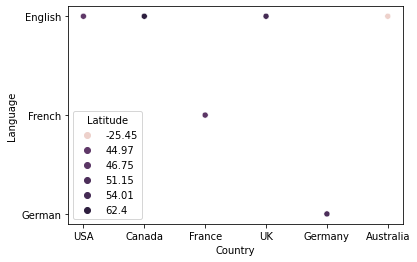

In [45]:
sns.scatterplot(df['Country'],df['Language'],hue=df['Latitude'])

In [46]:
from sklearn.cluster import KMeans
x=df[['Latitude','Longitude']]
model =KMeans(n_clusters=3)
model.fit(x)

KMeans(n_clusters=3)

In [57]:
y_pred =model.fit_predict(x)
y_pred

array([0, 0, 1, 1, 1, 2])

In [54]:
y_pred

array([0, 0, 1, 1, 1, 2])

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

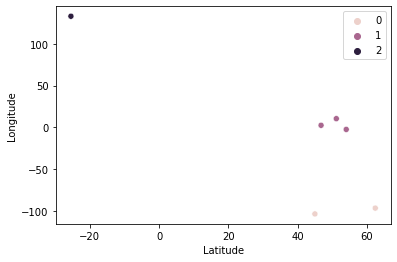

In [58]:
sns.scatterplot(df['Latitude'],df['Longitude'],hue=y_pred)

In [60]:
model.cluster_centers_

array([[  53.685     , -100.285     ],
       [  50.63666667,    3.42333333],
       [ -25.45      ,  133.11      ]])

In [61]:
wcss_list=[]
k_range =range(1,7)
for i in k_range:
    model =KMeans(n_clusters=i)
    model.fit(x)
    wcss_list.append(model.inertia_)
wcss_list

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

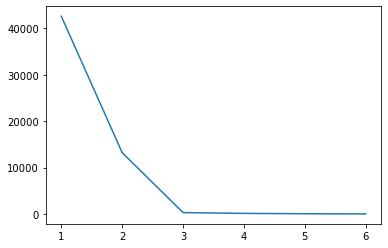

In [62]:
plt.plot(k_range,wcss_list)

In [64]:
from sklearn.metrics import silhouette_score
kme =KMeans(n_clusters=3)
kme.fit(x)
y_pred =kme.fit_predict(x)
y_pred

array([2, 2, 0, 0, 0, 1])

In [65]:
silhouette_score(x,y_pred)

0.7232813961472381

In [66]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [67]:
df =pd.read_csv("D:/PYTHON_NOTES/CSV/diabetes.csv")

In [68]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [70]:
x=df.drop('Outcome',axis=1)

In [77]:
k =KMeans(n_clusters=3)
k.fit(x)
pred =k.fit_predict(x)

In [78]:
silhouette_score(x,pred)

0.5104287492214447

In [79]:
wscss =[]
k_range =range(1,10)
for i in k_range:
    k =KMeans(n_clusters=i)
    k.fit(x)
    wscss.append(k.inertia_)

In [80]:
wscss

[11615812.918327227,
 5142376.455984382,
 2913322.58008178,
 2150903.356596102,
 1736866.892228902,
 1466740.4084335377,
 1303177.0065288085,
 1146667.0131488133,
 1002606.5036966932]

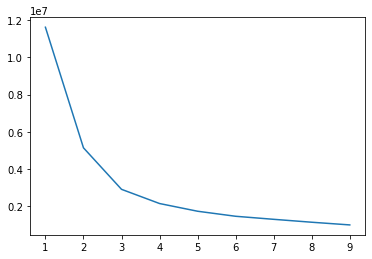

In [82]:
plt.plot(k_range,wscss)

In [86]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [87]:
x=df.drop("Outcome",axis=1)
y=df['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [88]:
Random_forest = RandomForestClassifier()
Random_forest.fit(x_train,y_train)


RandomForestClassifier()

In [89]:
y_pred_train = Random_forest.predict(x_train)

accuracy_score_=accuracy_score(y_train,y_pred_train)
accuracy_score_

1.0

In [90]:
y_pred_test = Random_forest.predict(x_test)

accuracy_score_=accuracy_score(y_test,y_pred_test)
accuracy_score_

0.7402597402597403

In [91]:
wcss_list =[]
k_range =range(1,10)
for i in k_range:
    kmodel=KMeans(n_clusters=i)
    kmodel.fit(x)
    wcss_list.append(kmodel.inertia_)
wcss_list

[11615812.918327227,
 5142376.455984382,
 2913322.58008178,
 2151320.938003855,
 1736866.8922289023,
 1467003.608797013,
 1301113.4338714497,
 1137691.3571531766,
 1003097.6727427328]

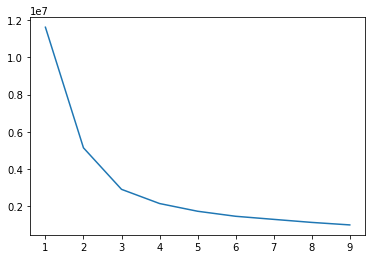

In [92]:
plt.plot(k_range,wcss_list)

In [95]:
k_model =KMeans(n_clusters=2)
k_model.fit(x)
pred2=k_model.fit_predict(x)
score2 =silhouette_score(x,pred2)
score2

0.5687897205830247

In [94]:
k_model =KMeans(n_clusters=3)
k_model.fit(x)
pred3=k_model.fit_predict(x)
score3 =silhouette_score(x,pred3)
score3

0.5104287492214447

In [96]:
pred2

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,

In [97]:
df['new_features']=pred2

In [98]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,new_features
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,0


In [ ]:
x=df.drop("Outcome",axis=1)
y=df['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

Random_forest = RandomForestClassifier()
Random_forest.fit(x_train,y_train)


In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:/Daily_Class_Note/3_11_SVM_Feature_Selection/apples_and_oranges.csv")

In [3]:
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [4]:
from sklearn.preprocessing import LabelEncoder
Label=LabelEncoder()
df['Class']=Label.fit_transform(df['Class'])

In [5]:
df.head()

,Weight,Size,Class
0,69,4.39,1
1,69,4.21,1
2,65,4.09,1
3,72,5.85,0
4,67,4.70,1


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Size', ylabel='Weight'>

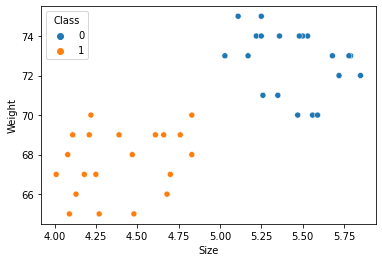

In [7]:
sns.scatterplot(df['Size'],df['Weight'],hue=df['Class'])

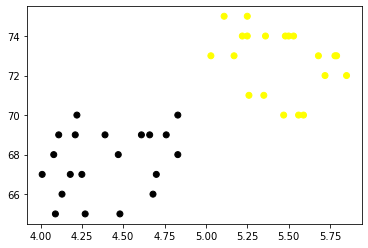

In [8]:
plt.scatter(df['Size'],df['Weight'],c=df['Class'],cmap='gnuplot_r')

In [9]:
y=df['Class']
x=df.drop('Class',axis=1)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=45,stratify=y)

In [11]:
model =SVC()
model.fit(x_train,y_train)

SVC()

In [12]:
y_pred =model.predict(x_train)
classification_report_=classification_report(y_train,y_pred)
print(classification_report_)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.94      0.97        16

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



In [13]:
y_pred =model.predict(x_test)
classification_report_=classification_report(y_test,y_pred)
print(classification_report_)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [14]:
df = pd.read_csv("D:/Daily_Class_Note/3_11_SVM_Feature_Selection/Social_Network_Ads.csv")

In [15]:
df.drop('User ID',axis=1,inplace=True)

In [16]:
df.replace({'Male':0,'Female':1},inplace=True)

In [17]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

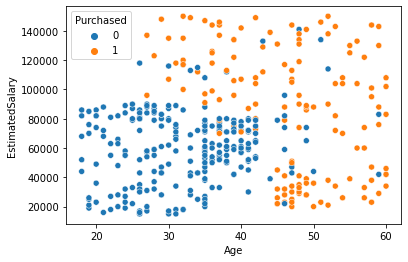

In [18]:
sns.scatterplot(df['Age'],df['EstimatedSalary'],hue=df['Purchased'])

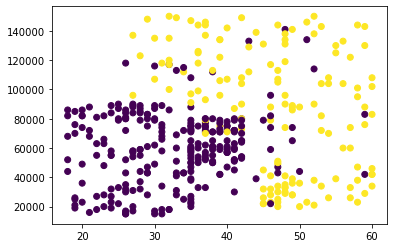

In [19]:
plt.scatter(df['Age'],df['EstimatedSalary'],c=df['Purchased'])

In [20]:
x=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [22]:
model = SVC()
model.fit(x_train,y_train)

SVC()

In [23]:
y_pred = model.predict(x_train)
classification_report_=classification_report(y_train,y_pred)
print(classification_report_)

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       206
           1       0.85      0.45      0.59       114

    accuracy                           0.78       320
   macro avg       0.80      0.70      0.72       320
weighted avg       0.79      0.78      0.75       320



In [24]:
y_pred = model.predict(x_test)
classification_report_=classification_report(y_test,y_pred)
print(classification_report_)

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        51
           1       0.85      0.38      0.52        29

    accuracy                           0.75        80
   macro avg       0.79      0.67      0.68        80
weighted avg       0.77      0.75      0.72        80



# hyperparameter

In [ ]:
svc_model =SVC()
hyper ={'kernel':['linear','square','poly','rbf','sigmoid'],
       'C':np.arange(1,5)}
random =RandomizedSearchCV(svc_model,hyper,cv=4)
random.fit(x_train,y_train)